# Linear Regression Example
### - Data set from 365datascience.com
#### '1.04. Real-life example.csv'

Linear Regression Flow (OLS):
    1. import libraries
    2. load the data
    3. explore the data
        a. variables 
        b. descriptive statistics
    4. drop the unnecessary variables / determine the variables of interest
    5. drop the missing values
    6. drop the outliers in the quantitative variables by checking their probability distributions
    7. Check the percentage of data lost (limit approx. 5%)
    8. Handle the dummy variables
    9. Check OLS assumptions
        a. Linearity
            i. Check the scatter plots of the q.variables vs dependent variable.
            ii. Perform log transformations if necessary
            iii. Add the transformed variables to the columns
            iv. Drop the non-transformed variable column
        b. No Endogeneity (no relationship btw the error and the variables (covar =0): for example price and demand usually have endogeneity)
        c. Normality of the error and Homoscedasticity(constant variance)
        d. No Autocorrelation (Observations made around the same time should not be similar. This cannot be relaxed)
        e. No multicolinearity (VIF should be less than 5)
            i. Perform VIF test
            ii. Drop variables with VIF greater than 5 (or check the standards)
     10. Standardize the dependent variable
     11. Split the data Train vs Test
     12. Perform regression
     13. Fit the train data
     14. Test the the test data
     15. Compare the test_y to predicted_y
     16. calculate the residuals
     17. calculate % Difference
     18. Create a summary table
    

### 1. Importing the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### 2. Loading the raw data

In [2]:
raw_data = pd.read_csv('01.Used_Car_Price_Data_Sample.csv')

##  Preprocessing

### 3.a. Explore the variables

In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### 3.b. Descriptive statistics of the variables

In [4]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### 4. Determining the variables of interest

In [5]:
data_variables_interest = raw_data.drop('Model', axis=1)
data_variables_interest.head(1)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991


### 5. Dealing with missing values

In [6]:
data_variables_interest.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
data_no_mv = data_variables_interest.dropna(axis=0)
data_no_mv.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [8]:
data_no_mv.head(1)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991


In [9]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### 6.a. Explore the PDFs

In [10]:
#import your favorite graphing library

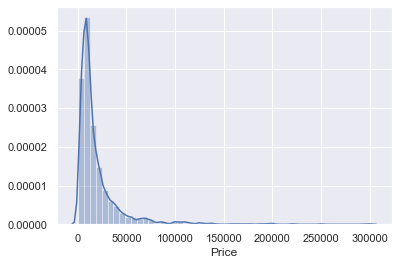

In [11]:
#Graph the PDF for the dependent variable to spot outliers

sns.distplot(data_no_mv['Price'], label='Price')

In [12]:
#Remove outliers
q = data_no_mv['Price'].quantile(0.99)
data1 = data_no_mv[data_no_mv['Price'] < q]

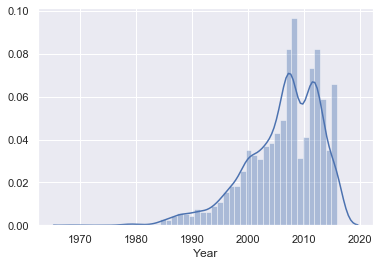

In [13]:
#Check the PDF for the independent variables
sns.distplot(data1['Year'], label='Year')

In [14]:
#Remove outliers
q = data1['Year'].quantile(0.01)
data2 = data1[data1['Year'] > q]

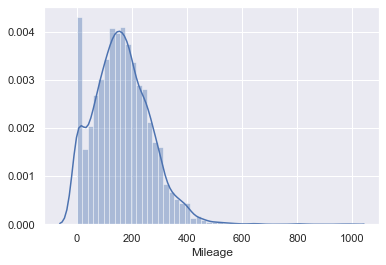

In [15]:
sns.distplot(data2['Mileage'], label='Mileage')

In [16]:
#Remove outliers
q = data2['Mileage'].quantile(0.99)
data3 = data2[data2['Mileage'] < q]

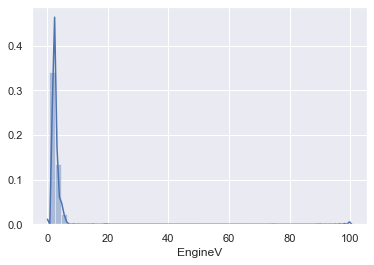

In [17]:
sns.distplot(data3['EngineV'], label='EngineV')

In [18]:
#Remove outliers
q = data3['EngineV'].quantile(0.99)
data4 = data3[data3['EngineV'] < q]

### 6.b. Handle the outliers

In [19]:
#make a copy of the final data
data_no_outlier = data4.copy()

### 7. Check the descriptive statistics again

In [20]:
#check the descriptive statistics again to make sure we haven't lost too much data
data_no_outlier.describe()

,Price,Mileage,EngineV,Year
count,3849.000000,3849.000000,3849.000000,3849.000000
mean,18083.933518,160.695505,2.434334,2006.705378
std,19007.246844,95.502712,0.918739,6.108085
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,92.000000,1.800000,2003.000000
50%,11600.000000,157.000000,2.200000,2008.000000
75%,21500.000000,226.000000,3.000000,2012.000000
max,129222.000000,432.000000,6.000000,2016.000000


In [21]:
print ('We removed ',round(((4025-3849)*100/4025),1), '% of the data_no_mv. \
Generally 5% or less data loss is acceptable during the cleaning process')

We removed  4.4 % of the data_no_mv. Generally 5% or less data loss is acceptable during the cleaning process


### 8. Handle the categorical data with dummy variables

In [22]:
#We need to handle the categorical variables
data_no_outlier.head(1)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991


In [23]:
#must drop the first unique value of each categorical variable
data_with_dummies = pd.get_dummies( data_no_outlier, drop_first=True)

#check the new data table
data_with_dummies.head(1)

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## 9. Check the OLS assumptions

### 9.a. Check for linearity by scatter plots

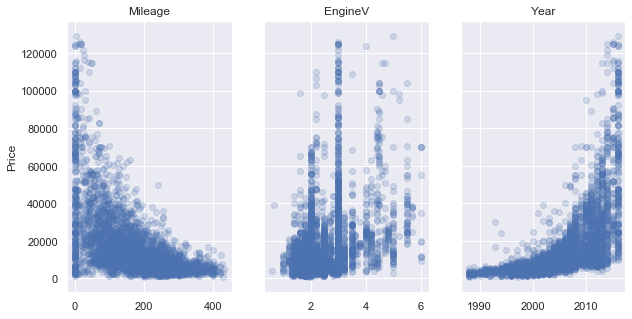

In [24]:
#setting the y variable saves typing
y = data_with_dummies['Price']

#matplotlib.pyplot.subplots creates 1x3 grid for the scatterplots
f, (f1,f2,f3) = plt.subplots(1,3, sharey=True ,figsize=(10,5))

#setting the alpha to 0.2 highlights the concentrated areas
#first graph
f1.scatter(data_with_dummies['Mileage'],y, alpha=0.2)
f1.set_title('Mileage')
f1.set_ylabel('Price')

#Second graph
f2.scatter(data_with_dummies['EngineV'],y, alpha=0.2)
f2.set_title('EngineV')

#Third graph
f3.scatter(data_with_dummies['Year'],y, alpha=0.2)
f3.set_title('Year')

plt.show()

### Relaxing the assumptions

### 9.a.1. Perform log transformation if necessary

In [25]:
#dependent variable vs independent variables scatter plots imply exponential distribution
#log transformation might relax this problem
log_price = np.log(data_with_dummies['Price'])

### 9.a.2. Scatter Plot the variables with log transformation to confirm linearity

Text(0.5, 1.0, 'Year')

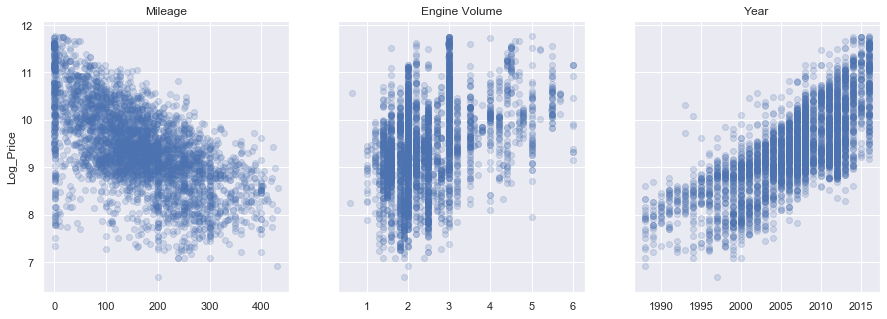

In [26]:
f, (i1, i2, i3) = plt.subplots(1,3, figsize = (15,5), sharey=True)

i1.scatter(data_with_dummies['Mileage'], log_price, alpha=0.2)
i1.set_title('Mileage')
i1.set_ylabel('Log_Price')

i2.scatter(data_with_dummies['EngineV'], log_price, alpha=0.2)
i2.set_title('Engine Volume')

i3.scatter(data_with_dummies['Year'], log_price, alpha=0.2)
i3.set_title('Year')


### 9.a.3 Add the log_dependent variable column to the data

### 9.a.4. Drop the dependent variable column from the data

In [27]:
#use pandas method to add the transformed dependent variable to the data frame and drop the original variable
data_log = data_with_dummies.copy()
data_log['log_price'] = log_price


In [28]:
#drop the Price since log_price is now in the table
data_log = data_log.drop('Price', axis=1)

#move the dependent variable to the left
data_log.columns

Index(['Mileage', 'EngineV', 'Year', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes', 'log_price'],
      dtype='object')

In [29]:
data_log = data_log[['log_price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']]
data_log.columns

Index(['log_price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype='object')

### 9.c. Normality of the error and Homoscedasticity(constant variance)

In [30]:
#Refer to the scatter plots to confirm constant variance

## 9.e. No Multicollinearity

### 9.e.i. Check variance inflation factors

In [31]:
#save the independent variables in a new data frame
x_variables = data_log.drop('log_price', axis=1)
x_variables.head(1)

,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [32]:
#create a new data frame to store the VIF values
vif = pd.DataFrame()
vif['VIFs'] = [variance_inflation_factor(x_variables.values, i) for i in range(x_variables.shape[1])]

In [33]:
vif['Variables'] = x_variables.columns.values
vif

,VIFs,Variables
0,4.839136,Mileage
1,12.821088,EngineV
2,45.310322,Year
3,2.632715,Brand_BMW
4,3.072283,Brand_Mercedes-Benz
5,1.956419,Brand_Mitsubishi
6,2.461025,Brand_Renault
7,2.489292,Brand_Toyota
8,3.480801,Brand_Volkswagen
9,1.698510,Body_hatch


### 9.e.ii. Drop the variables with high VIF scores

In [34]:
#Naturally Year and Mileage are likely to correlate. 
x_variables = x_variables.drop('Year', axis=1 )

In [35]:
#run the VIF analysis after dropping the 
vif2 = pd.DataFrame()
vif2['VIF2'] = [variance_inflation_factor(x_variables.values, i) for i in range(x_variables.shape[1])]
vif2['Variables'] = x_variables.columns.values
vif2

,VIF2,Variables
0,4.530934,Mileage
1,8.147540,EngineV
2,2.327245,Brand_BMW
3,2.845608,Brand_Mercedes-Benz
4,1.648735,Brand_Mitsubishi
5,2.092382,Brand_Renault
6,2.188394,Brand_Toyota
7,2.859729,Brand_Volkswagen
8,1.468660,Body_hatch
9,1.532817,Body_other


In [36]:
x_variables.columns

Index(['Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [37]:
#Registration also has a high VIF
x_variables = x_variables.drop('Registration_yes', axis=1)

In [38]:
#run the VIF without the registration
vif3 = pd.DataFrame()
vif3['VIF']=[variance_inflation_factor(x_variables.values, i) for i in range(x_variables.shape[1])]
vif3['Variables'] = x_variables.columns.values
vif3

,VIF,Variables
0,4.483181,Mileage
1,6.409288,EngineV
2,2.217154,Brand_BMW
3,2.658108,Brand_Mercedes-Benz
4,1.479024,Brand_Mitsubishi
5,1.805603,Brand_Renault
6,1.982446,Brand_Toyota
7,2.453179,Brand_Volkswagen
8,1.438033,Body_hatch
9,1.492602,Body_other


In [39]:
#put the independent and dependent variables together
data_preprocessed = x_variables.copy()
data_preprocessed['log_price']=log_price

In [40]:
#reorganize the columns
data_preprocessed = data_preprocessed[['log_price','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol']]

In [41]:
data_preprocessed.head(1)

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,8.34284,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


## Preprocessing is complete

### <><><><><><><><><><>

## Regression

### 10. Standardize the independent variables

In [42]:
#import the standard scaler class from the sklearn library
#create an instance of the StandardScaler class
scaler = StandardScaler()

In [43]:
#fit the x_variables
scaler.fit(x_variables)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
#standardize the x_variables
x_scaled = scaler.transform(x_variables)

In [45]:
#declare the y variable
y=data_preprocessed['log_price']

### 11. split the data into train and test

In [46]:
#import the train_test_split from sklearn.model_slection
train_x, test_x, train_y, test_y = train_test_split(x_scaled,y, random_state=50, test_size = 0.2 )

In [47]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((3079, 16), (3079,), (770, 16), (770,))

### 12. Perform regression

In [48]:
#import the Linear Regression class from sklearn.linear_model
reg = LinearRegression()

### 13. Fit the data with the training set

In [49]:
reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
#create a regression summary table
regression_summary = pd.DataFrame()
regression_summary['Features']=x_variables.columns

In [51]:
#add the coefficients to the regression table
regression_summary['Weights'] = reg.coef_

In [52]:
#y intercept
bias = reg.intercept_

In [53]:
regression_summary

,Features,Weights
0,Mileage,-0.530056
1,EngineV,0.219300
2,Brand_BMW,0.023672
3,Brand_Mercedes-Benz,0.047213
4,Brand_Mitsubishi,-0.111882
5,Brand_Renault,-0.133394
6,Brand_Toyota,-0.014046
7,Brand_Volkswagen,-0.045164
8,Body_hatch,-0.165056
9,Body_other,-0.089926


### 14. Test the model with the test set

In [54]:
#use the predict method with the test split
predicted_test_y = reg.predict(test_x)

### 15. Compare the test_y with predicted_test_y

In [55]:
summary = pd.DataFrame()
#undo the log conversion for clarity
summary['test_y'] = test_y
summary['predicted_test_y'] = predicted_test_y


### 16. Calculate the residuals

In [56]:
summary['residuals'] = summary['predicted_test_y']-summary['test_y']

### 17. Calculate the % difference

In [57]:
summary['% Difference'] = abs(summary['residuals']*100/summary['test_y'])

## 18. Regression Summary 

In [58]:
#sort by the %Difference and reset the index with drop index
summary= summary.sort_values('residuals', ascending=False).reset_index(drop=True)
summary

,test_y,predicted_test_y,residuals,% Difference
0,8.006368,10.300299,2.293932,28.651342
1,7.207860,9.093985,1.886125,26.167610
2,8.507143,10.385147,1.878004,22.075620
3,7.696213,9.547017,1.850804,24.048244
4,7.824046,9.644766,1.820720,23.270820
...,...,...,...,...
765,11.652687,10.580060,-1.072627,9.204975
766,11.744037,10.560680,-1.183357,10.076239
767,11.686879,10.488518,-1.198360,10.253896
768,10.477288,9.278414,-1.198874,11.442597


In [59]:
#Explore the descriptive statistics of the predictions
summary.describe()

,test_y,predicted_test_y,residuals,% Difference
count,770.000000,770.000000,770.000000,770.000000
mean,9.429399,9.417711,-0.011688,4.159971
std,0.854432,0.685552,0.509891,4.033758
min,7.207860,7.182086,-1.586412,0.000297
25%,8.902353,8.945874,-0.324487,1.415323
50%,9.384294,9.341270,-0.067488,2.860456
75%,9.942708,9.865087,0.237792,5.457049
max,11.769287,11.279610,2.293932,28.651342


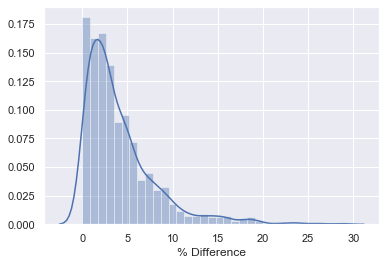

In [60]:
#check out the distribution of the %difference
sns.distplot(summary['% Difference'])

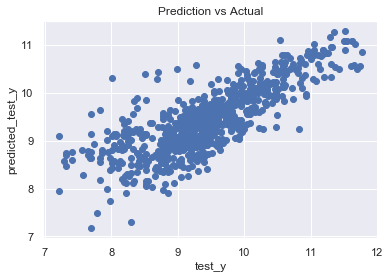

In [61]:
#Visually Compare prediction to the test
plt.scatter(summary['test_y'], summary['predicted_test_y'])
plt.xlabel('test_y')
plt.ylabel('predicted_test_y')
plt.title('Prediction vs Actual')
plt.show()

## 19. Test the Results

Our model has lower predictive power with lower priced cars.

In [62]:
#### R^2 score is
reg.score(x_scaled,y)

0.6376824174255258

In [63]:
#### convert log prices back to $prices
test_price_pred = np.exp(predicted_test_y)
test_price = np.exp(test_y)

Text(0, 0.5, 'test_predicted_price')

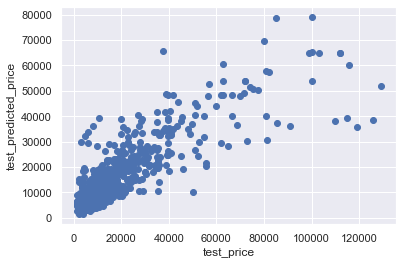

In [64]:
#### scatter plot them
plt.scatter(test_price, test_price_pred)
plt.xlabel('test_price')
plt.ylabel('test_predicted_price')

In [65]:
summary_exp = pd.DataFrame()
#undo the log conversion for clarity
summary_exp['test_price'] = test_price
summary_exp['predicted_test_price'] = test_price_pred
summary_exp['residuals'] = summary_exp['test_price']-summary_exp['predicted_test_price']
summary_exp['% Difference'] = abs(summary_exp['residuals']*100/summary_exp['test_price'])
summary_exp.sort_values('% Difference', ascending=True )

,test_price,predicted_test_price,residuals,% Difference
3754,22000.0,21999.347685,0.652315,0.002965
903,33700.0,33719.121455,-19.121455,0.056740
2616,11900.0,11886.889721,13.110279,0.110170
2667,7999.0,8009.937568,-10.937568,0.136737
1015,16999.0,17034.162648,-35.162648,0.206851
...,...,...,...,...
393,2500.0,15440.753856,-12940.753856,517.630154
4066,2200.0,14002.856141,-11802.856141,536.493461
1924,4950.0,32375.179875,-27425.179875,554.044038
2288,1350.0,8901.584413,-7551.584413,559.376623


In [66]:
summary_exp[summary_exp['% Difference'] > 20]

,test_price,predicted_test_price,residuals,% Difference
565,2200.0,9394.393598,-7194.393598,327.017891
1033,52777.0,29891.782905,22885.217095,43.362103
3847,45000.0,24500.447038,20499.552962,45.554562
1641,17900.0,23143.587724,-5243.587724,29.293786
3034,71999.0,53751.819397,18247.180603,25.343658
...,...,...,...,...
3945,40755.0,25641.574012,15113.425988,37.083612
2234,11500.0,6964.633284,4535.366716,39.437971
3374,22900.0,29788.677545,-6888.677545,30.081561
3559,5900.0,29361.622003,-23461.622003,397.654610


#### Evaluation of the model: 486 predictions based on the 770 test data differ more than 20% from the actual price. Our model isn't very good at predicting prices. especially near the extremes.

#### 20. Check the accuracy of the model using the training data

In [67]:
pred_train_y = reg.predict(train_x)

In [68]:
train_y_price = np.exp(train_y)
pred_train_y_price = np.exp(pred_train_y)

In [69]:
summary_train_y = pd.DataFrame()
#undo the log conversion for clarity
summary_train_y['train_price'] = train_y_price
summary_train_y['predicted_train_y_price'] = pred_train_y_price
summary_train_y['residuals'] = summary_train_y['train_price'] - summary_train_y['predicted_train_y_price']
summary_train_y['% Difference'] = abs(summary_train_y['residuals']*100/summary_train_y['train_price'])
summary_train_y.sort_values('% Difference', ascending=False )

,train_price,predicted_train_y_price,residuals,% Difference
2779,2400.0,41016.914626,-38616.914626,1609.038109
2676,4100.0,60159.365438,-56059.365438,1367.301596
3705,2500.0,33603.147358,-31103.147358,1244.125894
865,2550.0,29759.424261,-27209.424261,1067.036246
3478,2600.0,30218.163960,-27618.163960,1062.237075
...,...,...,...,...
3359,7700.0,7696.430796,3.569204,0.046353
2805,11999.0,11993.622250,5.377750,0.044818
1420,8800.0,8797.724571,2.275429,0.025857
307,6200.0,6200.818027,-0.818027,0.013194


Text(0, 0.5, 'train_y_predicted $')

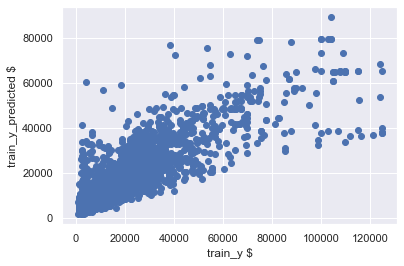

In [70]:
plt.scatter(train_y_price, pred_train_y_price)
plt.xlabel('train_y $')
plt.ylabel('train_y_predicted $')

## This last graph should look more like a line with a slope of 1.


In [71]:
round(data_no_mv.groupby('Brand').mean(),1)

,Price,Mileage,EngineV,Year
Brand,,,,
Audi,18906.6,180.7,2.6,2004.8
BMW,23648.2,173.5,3.2,2005.0
Mercedes-Benz,30825.8,182.8,3.3,2005.8
Mitsubishi,11403.4,141.6,2.3,2006.3
Renault,8066.7,156.7,2.5,2008.2
Toyota,22772.8,117.7,2.7,2008.4
Volkswagen,13122.9,167.9,2.3,2006.6
